# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

import cv2 as cv
print("Open CV Version :"+cv.__version__)

from PIL import Image

# To be able to use Warning
import warnings
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics
from scipy.spatial import distance
from sklearn.metrics import silhouette_score

Python Version :sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.5
Seaborn Version :0.10.1
Open CV Version :3.4.2


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on
picture_directory = './Flipkart/Images-SIFT/'
input_df = pd.read_csv('./DataSet.csv', sep=",", header=0)
main_categories = input_df['product_main_category'].unique()
number_of_categories = input_df['product_main_category'].nunique()
# Enable logging
# logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt='%H:%M:%S', level=logging.INFO

### Display a picture for each category

###### SIFT 

In [3]:
algo_constructor = cv.xfeatures2d.SIFT_create()

In [ ]:
def compute_descriptors(imagename):
    originalimage1 = cv.imread(picture_directory+imagename)
    originalimage2 = cv.imread(picture_directory+imagename)
    nonoiseimage = cv.imread(picture_directory+imagename.split('.jpg')[0]+'_clean.jpg')
    resizedimage = cv.imread(picture_directory+imagename.split('.jpg')[0]+'_resized.jpg')
    keypoints, descriptors = algo_constructor.detectAndCompute(originalimage1, None)  # Computing the key points and the descriptors
    originalimage2 = cv.drawKeypoints(resizedimage, keypoints, originalimage2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print("Descriptors "+np.array_str(descriptors))
    # descriptors_list.append((picture_directory, descriptors))  # Appending all the descriptors into the single list
    return originalimage1, nonoiseimage, resizedimage, originalimage2

In [ ]:
def descriptors_display(imagename, topic):
    originalimage, nonoiseimage, resizedimage, keypointsimage = compute_descriptors(imagename)
    fig, axs = plt.subplots(1, 4, figsize=(30, 12))
    axs[0].set_title('Original Picture '+topic, fontsize=12)
    axs[0].imshow(originalimage)
    axs[1].set_title('The noise is removed for '+topic, fontsize=12)
    axs[1].imshow(nonoiseimage, cmap='Greys_r')
    axs[2].set_title('The resized image for'+topic, fontsize=12)
    axs[2].imshow(resizedimage, cmap='Greys_r')
    axs[3].set_title('The keypoints image for'+topic, fontsize=12)
    axs[3].imshow(keypointsimage, cmap='Greys_r')

In [ ]:
for category in main_categories:
    print(category)
    # input_df.loc[category, 'product_main_category']
    image_name = input_df.loc[input_df['product_main_category'] == category].iloc[1]['image']
    print(image_name)
    # Charger l'image
    descriptors_display(image_name, category)

### Train / Test among categories

###### Display the number of values by category

In [4]:
input_df['product_main_category'].value_counts()

Home Decor & Festive Needs     150
Kitchen & Dining               150
Baby Care                      150
Watches                        150
Home Furnishing                150
Beauty and Personal Care       150
Computers                      150
Name: product_main_category, dtype: int64

In [5]:
number_of_product_by_category = input_df['product_main_category'].value_counts().values[0]

In [ ]:
input_df

###### Train set

In [6]:
# train_size = (int)(0.1 * number_of_product_by_category)
train_size = 100

In [7]:
train_df = pd.DataFrame()
for category in main_categories:
    print(category)
    subset_df = input_df.loc[input_df['product_main_category'] == category][:train_size]
    subset_df.loc[(subset_df['product_main_category'] == category), 'algo'] = "train"
    # print(subset_df)
    train_df = train_df.append(subset_df)

Home Furnishing 
Baby Care 
Watches 
Home Decor & Festive Needs 
Kitchen & Dining 
Beauty and Personal Care 
Computers 


In [ ]:
# train_size = 30

In [ ]:
train_df

###### Test set

In [ ]:
# input_df['algo'].isnull().sum()

In [8]:
# test_size = (int)(0.05 * number_of_product_by_category)
test_size = 50

In [9]:
test_df = pd.DataFrame()
for category in main_categories:
    print(category)
    subset_df = input_df.loc[input_df['product_main_category'] == category][train_size:train_size+test_size]
    subset_df.loc[(subset_df['product_main_category'] == category), 'algo'] = "train"
    # print(subset_df)
    test_df = test_df.append(subset_df)

Home Furnishing 
Baby Care 
Watches 
Home Decor & Festive Needs 
Kitchen & Dining 
Beauty and Personal Care 
Computers 


In [ ]:
test_df

### Load train and test images into  dictionaries

In [10]:
# takes all images and convert them to grayscale.
# return a dictionary that holds all images category by category.
def load_images_from_df(my_df):
    images = {}
    image_list = list(my_df['image'])
    for cat in my_df['product_main_category'].unique():
        category = []
        # print(my_df.loc[my_df['product_main_category'] == cat, 'image'])
        for imagename in list(my_df.loc[my_df['product_main_category'] == cat, 'image']):
            img = cv.imread(picture_directory+imagename.split('.jpg')[0]+'_resized.jpg')
            if img is not None:
                category.append(img)
        images[cat] = category
    return images

In [11]:
train_images = load_images_from_df(train_df)  # take all train images
test_images = load_images_from_df(test_df)  # take test images

In [ ]:
train_images

### Extraction of local features from images using SIFT

In [12]:
# Creates descriptors using sift
# Takes one parameter that is images dictionary
# Return an array whose first index holds the decriptor_list without an order
# And the second index holds the sift_vectors dictionary which holds the descriptors but this is seperated class by class
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv.xfeatures2d.SIFT_create()
    for key, value in images.items():
        features = []
        print(key)
        counter = 0
        for img in value:
            counter = counter + 1
            kp, des = sift.detectAndCompute(img, None)
            descriptor_list.extend(des)
            features.append(des)
            print("Counter "+(str)(counter))
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]


sifts = sift_features(train_images)
# Takes the descriptor list which is unordered one
descriptor_list = sifts[0]
# Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1]
# Takes the sift features that is seperated class by class for test data
test_bovw_feature = sift_features(test_images)[1]

Home Furnishing 
Counter 1
Counter 2
Counter 3
Counter 4
Counter 5
Counter 6
Counter 7
Counter 8
Counter 9
Counter 10
Counter 11
Counter 12
Counter 13
Counter 14
Counter 15
Counter 16
Counter 17
Counter 18
Counter 19
Counter 20
Counter 21
Counter 22
Counter 23
Counter 24
Counter 25
Counter 26
Counter 27
Counter 28
Counter 29
Counter 30
Counter 31
Counter 32
Counter 33
Counter 34
Counter 35
Counter 36
Counter 37
Counter 38
Counter 39
Counter 40
Counter 41
Counter 42
Counter 43
Counter 44
Counter 45
Counter 46
Counter 47
Counter 48
Counter 49
Counter 50
Counter 51
Counter 52
Counter 53
Counter 54
Counter 55
Counter 56
Counter 57
Counter 58
Counter 59
Counter 60
Counter 61
Counter 62
Counter 63
Counter 64
Counter 65
Counter 66
Counter 67
Counter 68
Counter 69
Counter 70
Counter 71
Counter 72
Counter 73
Counter 74
Counter 75
Counter 76
Counter 77
Counter 78
Counter 79
Counter 80
Counter 81
Counter 82
Counter 83
Counter 84
Counter 85
Counter 86
Counter 87
Counter 88
Counter 89
Counter 90
Co

Counter 41
Counter 42
Counter 43
Counter 44
Counter 45
Counter 46
Counter 47
Counter 48
Counter 49
Counter 50
Baby Care 
Counter 1
Counter 2
Counter 3
Counter 4
Counter 5
Counter 6
Counter 7
Counter 8
Counter 9
Counter 10
Counter 11
Counter 12
Counter 13
Counter 14
Counter 15
Counter 16
Counter 17
Counter 18
Counter 19
Counter 20
Counter 21
Counter 22
Counter 23
Counter 24
Counter 25
Counter 26
Counter 27
Counter 28
Counter 29
Counter 30
Counter 31
Counter 32
Counter 33
Counter 34
Counter 35
Counter 36
Counter 37
Counter 38
Counter 39
Counter 40
Counter 41
Counter 42
Counter 43
Counter 44
Counter 45
Counter 46
Counter 47
Counter 48
Counter 49
Counter 50
Watches 
Counter 1
Counter 2
Counter 3
Counter 4
Counter 5
Counter 6
Counter 7
Counter 8
Counter 9
Counter 10
Counter 11
Counter 12
Counter 13
Counter 14
Counter 15
Counter 16
Counter 17
Counter 18
Counter 19
Counter 20
Counter 21
Counter 22
Counter 23
Counter 24
Counter 25
Counter 26
Counter 27
Counter 28
Counter 29
Counter 30
Counter 

### Creation of a visual dictionary, only the train dataset is used

In [13]:
len(descriptor_list)

207692

In [14]:
# A k-means clustering algorithm who takes 2 parameter which is number
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    # kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans = MiniBatchKMeans(n_clusters=k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_
    labels = kmeans.labels_
    silhouette_score = metrics.silhouette_score(descriptor_list, labels)
    calinski_harabasz_score = metrics.calinski_harabasz_score(descriptor_list, labels)
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    return visual_words, labels
# Takes the central points which is visual words
visual_words, labels = kmeans(150, descriptor_list)

16:1: E305 expected 2 blank lines after class or function definition, found 0


silhouette_score 0.030855743
calinski_harabasz_score 1215.6977989550483


###### Get the Category Type for each feature

In [15]:
# print(all_bovw_feature)
counter = 0
type_list = []
for key, value in all_bovw_feature.items():
    print(key)
    count = 1
    for img in value:
        counter = counter + img.shape[0]
        print((str)(key) + " " + (str)(count) + " " + (str)(img.shape) + " counter " + (str)(counter))
        type_list = type_list + [key] * img.shape[0]
        count = count + 1
type_list_df = pd.DataFrame(type_list, columns=['product_main_category'])

Home Furnishing 
Home Furnishing  1 (335, 128) counter 335
Home Furnishing  2 (536, 128) counter 871
Home Furnishing  3 (424, 128) counter 1295
Home Furnishing  4 (221, 128) counter 1516
Home Furnishing  5 (504, 128) counter 2020
Home Furnishing  6 (148, 128) counter 2168
Home Furnishing  7 (397, 128) counter 2565
Home Furnishing  8 (336, 128) counter 2901
Home Furnishing  9 (283, 128) counter 3184
Home Furnishing  10 (410, 128) counter 3594
Home Furnishing  11 (283, 128) counter 3877
Home Furnishing  12 (401, 128) counter 4278
Home Furnishing  13 (398, 128) counter 4676
Home Furnishing  14 (438, 128) counter 5114
Home Furnishing  15 (411, 128) counter 5525
Home Furnishing  16 (554, 128) counter 6079
Home Furnishing  17 (263, 128) counter 6342
Home Furnishing  18 (495, 128) counter 6837
Home Furnishing  19 (683, 128) counter 7520
Home Furnishing  20 (436, 128) counter 7956
Home Furnishing  21 (190, 128) counter 8146
Home Furnishing  22 (693, 128) counter 8839
Home Furnishing  23 (363, 

Home Decor & Festive Needs  89 (144, 128) counter 133760
Home Decor & Festive Needs  90 (209, 128) counter 133969
Home Decor & Festive Needs  91 (514, 128) counter 134483
Home Decor & Festive Needs  92 (350, 128) counter 134833
Home Decor & Festive Needs  93 (255, 128) counter 135088
Home Decor & Festive Needs  94 (183, 128) counter 135271
Home Decor & Festive Needs  95 (390, 128) counter 135661
Home Decor & Festive Needs  96 (606, 128) counter 136267
Home Decor & Festive Needs  97 (177, 128) counter 136444
Home Decor & Festive Needs  98 (96, 128) counter 136540
Home Decor & Festive Needs  99 (151, 128) counter 136691
Home Decor & Festive Needs  100 (128, 128) counter 136819
Kitchen & Dining 
Kitchen & Dining  1 (382, 128) counter 137201
Kitchen & Dining  2 (98, 128) counter 137299
Kitchen & Dining  3 (73, 128) counter 137372
Kitchen & Dining  4 (337, 128) counter 137709
Kitchen & Dining  5 (264, 128) counter 137973
Kitchen & Dining  6 (149, 128) counter 138122
Kitchen & Dining  7 (238

Computers  13 (151, 128) counter 191774
Computers  14 (336, 128) counter 192110
Computers  15 (222, 128) counter 192332
Computers  16 (147, 128) counter 192479
Computers  17 (174, 128) counter 192653
Computers  18 (74, 128) counter 192727
Computers  19 (512, 128) counter 193239
Computers  20 (196, 128) counter 193435
Computers  21 (125, 128) counter 193560
Computers  22 (105, 128) counter 193665
Computers  23 (97, 128) counter 193762
Computers  24 (141, 128) counter 193903
Computers  25 (64, 128) counter 193967
Computers  26 (148, 128) counter 194115
Computers  27 (226, 128) counter 194341
Computers  28 (177, 128) counter 194518
Computers  29 (135, 128) counter 194653
Computers  30 (68, 128) counter 194721
Computers  31 (53, 128) counter 194774
Computers  32 (50, 128) counter 194824
Computers  33 (83, 128) counter 194907
Computers  34 (108, 128) counter 195015
Computers  35 (32, 128) counter 195047
Computers  36 (160, 128) counter 195207
Computers  37 (127, 128) counter 195334
Computer

In [ ]:
len(all_bovw_feature['Home Furnishing '])

In [ ]:
type_list_df

In [16]:
# Find the index of the closest central point to the each sift descriptor. # Takes 2 parameters the first one is a sift descriptor and the second one is the array of central points in k means
# Returns the index of the closest central point.
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
            count = distance.euclidean(image, center[i])
        else:
            dist = distance.euclidean(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

### Creation of histograms for both test and train images.

In [17]:
# Takes 2 parameters. The first one is a dictionary that holds the descriptors that are separated class by class
# And the second parameter is an array that holds the central points (visual words) of the k means clustering
# Returns a dictionary that holds the histograms for each images that are separated class by class.
def image_class(all_bovw, centers):
    dict_feature = {}
    for key, value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature



# Creates histograms for train data
bovw_train = image_class(all_bovw_feature, visual_words)
# Creates histograms for test data
bovw_test = image_class(test_bovw_feature, visual_words)

19:1: E303 too many blank lines (3)
20:1: E305 expected 2 blank lines after class or function definition, found 3


###  Get a array with the histograms of the images

In [18]:
# print(all_bovw_feature)
images_array = []
for key, value in bovw_train.items():
    for img in value:
        images_array.append(img)
# trails_df = pd.DataFrame(type_list, columns=['product_main_category'])

In [19]:
len(images_array[0])

150

### TSNE

In [20]:
def tsne_analysis(myinput_df, myX, algo):
    myX_embedded = TSNE(n_components=2).fit_transform(myX)
    myX_embedded_df = pd.DataFrame(myX_embedded, columns=[algo+'1', algo+'2'])
    print(myX_embedded_df)
    myconcat_df = pd.concat([myinput_df, myX_embedded_df], axis=1, sort=False)
    # print("myconcat_df " + myconcat_df)
    silhouette_score = metrics.silhouette_score(myX_embedded, myconcat_df['product_main_category'])
    calinski_harabasz_score = metrics.calinski_harabasz_score(myX_embedded, myconcat_df['product_main_category'])
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    clusterer = KMeans(n_clusters=number_of_categories, random_state=42)
    cluster_labels = clusterer.fit_predict(myX_embedded_df)
    myKmeans_df = pd.DataFrame(cluster_labels, columns=['kmeans'+algo])
    kmeans_df = pd.concat([myX_embedded_df, myKmeans_df], axis=1, sort=False)
    sns.set(palette='muted', color_codes=True, style='darkgrid')
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    sns.despine(left=True)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[0], hue="product_main_category", data=myconcat_df)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[1], hue="kmeans"+algo, data=kmeans_df, legend="full")
    axs[0].set_title('TSNE on two dimensions for '+algo, fontsize=20)
    axs[0].set_xlabel(algo+'1', fontsize=15)
    axs[0].set_ylabel(algo+'2', fontsize=15)
    axs[0].tick_params(labelsize=12)
    axs[1].set_title('KMEANS on two dimensions for '+algo, fontsize=20)
    axs[1].set_xlabel(algo+'1', fontsize=15)
    axs[1].set_ylabel(algo+'2', fontsize=15)
    axs[1].tick_params(labelsize=12)
    fig.savefig(algo+'.png')
    return myconcat_df, silhouette_score, calinski_harabasz_score

         SIFT1      SIFT2
0     5.638564   1.642200
1    16.767685 -17.578890
2    18.933474 -15.288790
3     0.220085  11.359586
4    26.505924   7.413346
..         ...        ...
695  22.993402   5.872017
696 -18.131367 -16.179493
697 -10.826139 -15.873509
698   9.495319   2.797976
699  22.545387   1.975032

[700 rows x 2 columns]
silhouette_score -0.10500022
calinski_harabasz_score 15.487172863023705


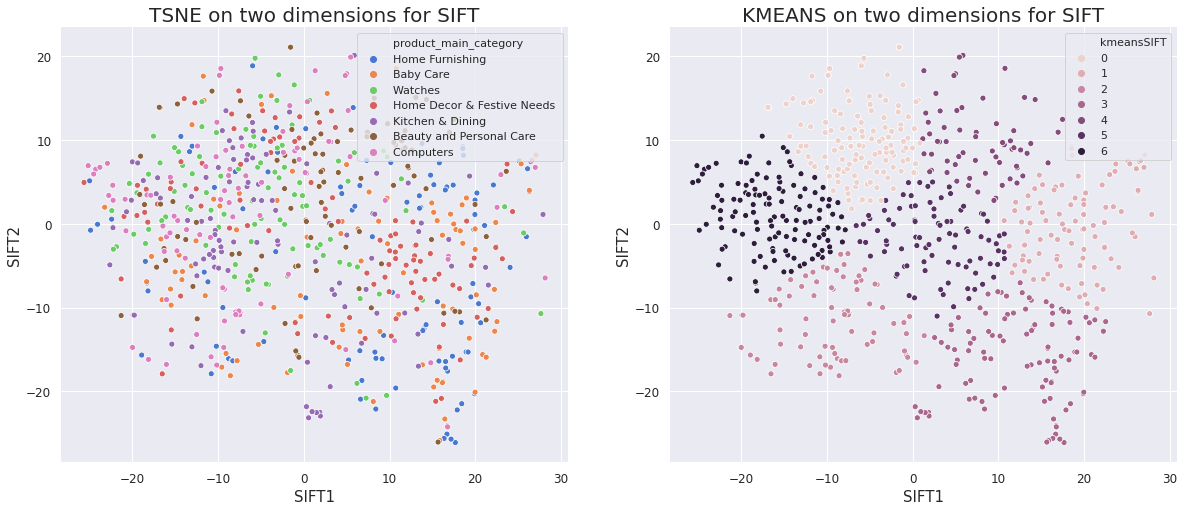

In [21]:
updatedsift_df, silhouette_sift, calinski_sift = tsne_analysis(train_df.reset_index(), images_array, 'SIFT')

In [ ]:
visual_words.shape

### Classes predictions of the test images with k-NN function. “k” is 1 in this case.

In [22]:
# 1-NN algorithm. We use this for predict the class of test images.
# Takes 2 parameters. images is the feature vectors of train images and tests is the feature vectors of test images
# Returns an array that holds number of test images, number of correctly predicted images and records of class based images respectively
def knn(images, tests):
    num_test = 0
    correct_predict = 0
    class_based = {}

    for test_key, test_val in tests.items():
        class_based[test_key] = [0, 0]  # [correct, all]
        for tst in test_val:
            predict_start = 0
            minimum = 0
            key = "a"
            for train_key, train_val in images.items():
                for train in train_val:
                    if(predict_start == 0):
                        minimum = distance.euclidean(tst, train)
                        key = train_key
                        predict_start += 1
                    else:
                        dist = distance.euclidean(tst, train)
                        if(dist < minimum):
                            minimum = dist
                            key = train_key

            if(test_key == key):
                correct_predict += 1
                class_based[test_key][0] += 1
            num_test += 1
            class_based[test_key][1] += 1
    return [num_test, correct_predict, class_based]


# Call the knn function
results_bowl = knn(bovw_train, bovw_test)

### Accuracy

In [23]:
# Calculates the average accuracy and class based accuracies.
def accuracy(results):
    avg_accuracy = (results[1] / results[0]) * 100
    print("Average accuracy: %" + str(avg_accuracy))
    print("\nClass based accuracies: \n")
    for key, value in results[2].items():
        acc = (value[0] / value[1]) * 100
        print(key + " : %" + str(acc))


# Calculates the accuracies and write the results to the console.
accuracy(results_bowl)

Average accuracy: %20.57142857142857

Class based accuracies: 

Home Furnishing  : %20.0
Baby Care  : %12.0
Watches  : %26.0
Home Decor & Festive Needs  : %30.0
Kitchen & Dining  : %24.0
Beauty and Personal Care  : %12.0
Computers  : %20.0


In [24]:
results_bowl[2]

{'Home Furnishing ': [10, 50],
 'Baby Care ': [6, 50],
 'Watches ': [13, 50],
 'Home Decor & Festive Needs ': [15, 50],
 'Kitchen & Dining ': [12, 50],
 'Beauty and Personal Care ': [6, 50],
 'Computers ': [10, 50]}

In [25]:
results_df = pd.DataFrame.from_dict(results_bowl[2], orient='index').reset_index()

In [26]:
results_df = results_df.rename(columns={"index": "Category", 0: "Score", 1: "Total"})

In [27]:
results_df['Results'] = results_df['Score'] * 100 / results_df['Total']

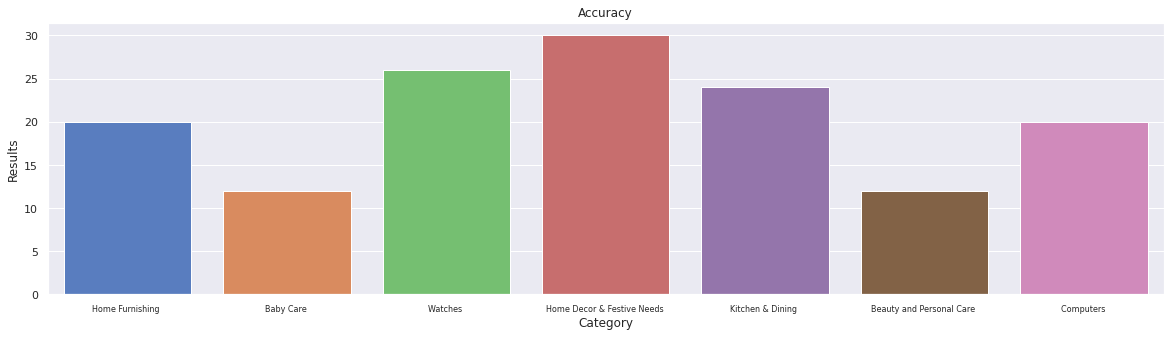

In [28]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x="Category", y="Results", data=results_df)
ax.set_title('Accuracy')
plt.xticks(size=8)
plt.savefig('accuracy_barplot.png')
plt.show()

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

In [ ]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)